# Exploratory Data Analysis

```{contents} Table of Contents
:depth: 4
```

## Introduction: John Tukey's Definition of Exploratory Data Analysis (EDA)
<figure class="image">
<center>
<img src="https://www.amphilsoc.org/sites/default/files/2019-10/Tukey%20graph%20head.jpg" width='400'>
<figcaption> John W. Tukey (Source: <a href="https://www.amphilsoc.org/history-science-collections">https://www.amphilsoc.org/history-science-collections</a>)</figcaption>
</center>
</figure>

[John W. Tukey](https://en.wikipedia.org/wiki/John_Tukey) was a prolific statistician and mathematician who coined the word "bit" to represent a unit of digital information, invented fast Fourrier transformations, and was the first person to use the word "software" in a published article. He is considered to be one of the founders of modern data science. One of his most influential contributions is the development of the concept of [Exploratory Data Analysis](https://www.google.com/books/edition/_/TpYOvgEACAAJ?hl=en&sa=X&ved=2ahUKEwjFz6afxbbqAhVdoHIEHdCjDXgQ7_IDMBB6BAgNEAI) (EDA) in a 1970 book by the same name. 

We've covered many techniques for acquiring data and loading it as a dataframe in Python. We've also covered many techniques for manipulating and cleaning the data. All of that work was to prepare the data to be analyzed. EDA is the first step towards extracting meaning from a prepared dataset: we can understand the properties of indiviual features, and we can describe the relationships between features. We can report these results in tables or in static or interactive visualizations. 

The goal of EDA is not to answer a specific research question, but rather to "dig in" to the data to get a better sense of the important properties of the data and to understand the key relationships in the data. EDA includes fast and simple approaches to collecting preliminary findings, for assessing the assumptions that underlie other methods, and for identifying problems and complications such as outliers.

While Tukey coined and popularized the term Exploratory Data Analysis, he defines the practice only loosely. In "[We Need Both Exploratory and Confirmatory](https://www.tandfonline.com/doi/abs/10.1080/00031305.1980.10482706)", which appeared in *The American Statistician* in 1980, Tukey explains that EDA is first and foremost "an attitude, [and] . . . [a] flexibility" (p. 24). He continues:
> No catalog of techniques can convey a willingness to look for what can be seen, whether or not anticipated. Yet this is at the heart of exploratory data analysis. The graph paper-and transparencies-are there, not as a technique, but rather as a recognition that the picture-examining eye is the best finder we have of the wholly unanticipated (p. 24).

In other words, EDA is not the kind of statistical work that begins with a specific research question or an unambiguous statement of a null hypothesis. EDA uses tables and graphs as a means for researchers to simply *see what's there*. And this kind of exploration can reveal unexpected properties of the data and surprising relationships. Tukey is not saying that that these findings in and of themselves constitute proof. But he does insist that the knowledge we gain from EDA should inform our design of subsequent confirmatory data analysis (CDA). CDA is the kind of statistical work that requires a clear research question and a carefully chosen research design, and EDA can help us to develop that question and design. Tukey concludes that EDA and CDA are both necessary for good science.

EDA can be a very joyful part of a data project. Remember that most data scientists report spending somewhere in the neighborhood of 80% of their time collecting and managing data. EDA is the stage in the data pipeline during which we can, finally, apply the data to gain insight and knowledge. Think about building a car in a garage: we've spent so much time collecting parts and putting in the labor to install them all in exactly the right way; EDA is like the moment when we can finally take the car we've built out for a ride around the block.

In previous modules, especially modules 2 and 8, we used descriptive statistics and visualizations of a dataframe to identify problems with the way the data are loaded or the way the data are organized. The process of checking data for problems at the loading or manipulation stages is sometimes called [initial data analysis](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis) (IDA). IDA differs from EDA in that IDA is not concerned with the goals of the research project or the ultimate questions we hope to answer through data analysis. EDA is loosely concerned with the goals of the research project: we want to explore the properties of the features that will be important for confirmatory analyses, but we want to examine the data in a way that allows unexpected and interesting stories to emerge from the data.

There is no fixed set of EDA methods: anything that helps us understand the data prior to a confirmatory model can count as EDA. Very generally, however, EDA methods can be either tabular or graphical. Tabular methods, discussed in this module, involve calculating descriptive statistics like means, variances, and percentiles, creating tables of frequencies or cross-tabulations, and simple hypothesis tests. Graphical methods, discussed in modules 11 and 12, involve data visualizations that can either be static or interactive for web-based presentations.

EDA can also involve measurement models. Sometimes we are interested in combining many features to construct an index of an underlying concept that we think influences the features in our observed data. These measurement models can be thought of as feature engineering, but if we let properties in the data define how the features should be combined, then the weights are important pieces of exploratory evidence that we can use when building confirmatory analysis designs.

## Descriptive Statistics (Example: the 2019 ANES Pilot Study)
A statistic is a value that summarizes some aspect of how data are distributed. Some statistics are called **descriptive** to distinguish them from **inferential** statistics. Descriptive statistics are statements about the sample of data that we are working with, and inferential statistics are statements about the likely values of the same statistic in the population given the sample statistic. 

There are a few broad categories of descriptive statistics. Measures of **location** or **central tendency** describe the values that typical datapoints take on. These statistics include the mean, a weighted mean, and the median. Measures of **variability** or **dispersion** report the typical distance that each datapoint's value is away from the middle or mean of the distribution and include the variance, standard deviation, and the interquartile range. These measures also can include the minimum and maximum values and various percentiles. Measures of **frequency** report the count of how many times each distinct value of categorical features appears in the data, or how many values of a continuous feature exist within pre-specified bins. These measures include both raw counts and percentages.

One quick way to display these descriptive statistics is to apply the `.describe()` method to a dataframe. See modules 2 and 8 for a discussion of `.describe()` and examples. Here we will cover additional EDA techniques.

To demonstrate the code to generate these descriptive statistics, we will use the American National Election Study's (ANES) 2019 pilot study. We previously manipulated and cleaned this dataset in modules 8 and 9, so we can use the clean version here. First we import the necessary packages:

In [1]:
import numpy as np
import pandas as pd
import sidetable
import weighted # this is a module of wquantiles, so type pip install wquantiles or conda install wquantiles to get access to it
from scipy import stats 
from sklearn import manifold
from sklearn import metrics
from matplotlib import pyplot as plt
import prince
from pandas_profiling import ProfileReport

Then we load the clean data:

In [2]:
anes = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/anes_pilot2019_clean.csv")
anes.columns

Index(['caseid', 'liveurban', 'vote16', 'protest', 'vote',
       'most_important_issue', 'confecon', 'ideology', 'partyID',
       'universal_income', 'family_separation', 'free_college',
       'forgive_loans', 'race', 'birthyr', 'sex', 'education', 'weight',
       'fttrump', 'ftobama', 'ftbiden', 'ftwarren', 'ftsanders', 'ftbuttigieg',
       'ftharris', 'ftblack', 'ftwhite', 'fthisp', 'ftasian', 'ftmuslim',
       'ftillegal', 'ftjournal', 'ftnato', 'ftun', 'ftice', 'ftnra', 'ftchina',
       'ftnkorea', 'ftmexico', 'ftsaudi', 'ftukraine', 'ftiran', 'ftbritain',
       'ftgermany', 'ftjapan', 'ftisrael', 'ftfrance', 'ftcanada', 'ftturkey',
       'ftrussia', 'ftpales', 'ftimmig', 'partisanship', 'ftbiden_level',
       'age', 'age2', 'ftbiden_float', 'ftbiden_cat', 'ftbiden_str',
       'prefersbiden', 'worried_econ', 'favor_both'],
      dtype='object')

### Measures of Location
Measures of location describe the value of a "typical" value in a column, although the definition of typical will vary depending on the statistic we employ. Measures of location are also called measures of central tendency.

The simplest descriptive statistic is the mean, which we can calculate with the `.mean()` method. Here is the average rating from 0 to 100, with 0 meaning highly unfavorable and 100 meaning highly favorable, of Joe Biden across all of the survey's respondents:

In [3]:
anes.ftbiden.mean()

42.15189466923571

Be aware that `.mean()` skips over `NaN` values in the column in calculating the mean. That may seem harmless, but it does make a specific assumption that the missing values are exactly equal to the mean of the column, and if that assumption is highly inaccurate then the calculation of the mean will also be inaccurate. For example, suppose that some people dislike Joe Biden so much that they refuse to answer the question and are coded as `NaN`. In that case the mean rating for Biden reported above is too high.

One way that a mean can be misleading is that it can be influenced by **outliers**: values of a column that are orders of magnitude higher or lower than the vast majority of values in the column. For example, out of all the majors at the University of North Carolina at Chapel Hill, the major with the highest average income after graduation is geography, not because most geography majors make more money, but because Michael Jordan was a geography major. Michael Jordan's enormous income skews the mean upwards. 

There are a few different ways to account for outliers in calculating a mean. First, we can calculate a trimmed mean. Given a percentage, a trimmed mean sorts the values of a column and removes the top and bottom percentage from the column. Then it calculates the mean from the remaining values. To calculate a trimmed mean, we can use the `stats.trim_mean()` function. Here is the mean of Biden's thermometer ratings with the top and bottom 10% of values removed:

In [4]:
stats.trim_mean(anes.ftbiden, .1)

41.58981444926964

Another way to account for outliers is to calculate the median. The median is the same as the 50th percentile: half of the column's values exist at or above the median and half exist at or below the median. Medians aren't sensitive to outliers, like Michael Jordan's income, because an outlier counts for just one observation regardless of the size of its value, and increasing the size of this value does not change the relative ordering of the rest of the values. The median Biden thermometer rating is:

In [5]:
anes.ftbiden.median()

42.0

Surveys like the ANES, which try to reach a random sample from a population, often find that the samples they end up with are sometimes very different demographically from the population they are trying to study. It is usually the case that some races, genders, educational levels, and socioeconomic statuses are overrepresented relative to others. One way that these surveys attempt to address these sampling biases is to calculate sampling weights that can be used to place greater or lesser emphasis on individual values when calculating statistics like means. 

Let's say, for example, that we draw a sample that contains 60% men and 40% women from a population with 50% men and 50% women. In this case, men are overrepresented in the sample and women are underrepresented. We can approximate a solution to this problem by reweighting each row with a man's responses as .5/.6 = .833, which means that this row impacts results only 83.3% as much as a regular row. Likewise, we reweight the rows for women by .5/.4 = 1.25.

The ANES contains these sampling weights, although they are stored as strings. I first convert these weights to a numeric data type:

In [6]:
anes.weight = pd.to_numeric(anes.weight.str.strip().replace({'':'1'}))
anes.weight

0       1.347197
1       0.780822
2       0.966367
3       1.103485
4       1.090697
          ...   
3160    1.000000
3161    7.036465
3162    0.892833
3163    1.581613
3164    0.809577
Name: weight, Length: 3165, dtype: float64

We can recalculate the average Biden rating while using these weights to count every row in a way that is more representative of the U.S. adult population. To calculate a weighted average, we can use the `np.average()` function, passing the `weight` column to the `weights` parameter. One issue with `np.average()` is that, unlike `.mean()`, is does not skip missing values: it replaces the result with `NaN` if there is even one missing value in the column. So to skip over missing values, we create a second version of the dataframe that removes rows for which `ftbiden` is missing. The weighted average of Biden's thermometer ratings is:

In [7]:
anes_temp = anes.loc[~anes.ftbiden.isna()]
np.average(anes_temp['ftbiden'], weights=anes_temp.weight)

43.31193635270897

To calculate a weighted median, we use the `weighted.median()` function from the `wquantiles` package. The first argument is the feature for which we want to calculate the median, and the second argument is the feature that contains the weights:

In [8]:
weighted.median(anes.ftbiden, anes.weight)

47.0

## Measures of Variability
Measures of variability, also called measures of dispersion, report on how far from the mean the "typical" value in a column happens to be. The two most common measures of variability are the variance and the standard deviation, which we can calculate with the `.var()` and the `.std()` methods, respectively:

In [9]:
[anes.ftbiden.var(), anes.ftbiden.std()]

[1118.0106501193195, 33.436666253071934]

Like `.mean()` and `.median()`, these methods deal with missing values by skipping over them. Please keep in mind that ths behavior, while convenient, can generate highly inaccurate descriptive statistics if the missing values are very different from the mean of the column.

These statistics can be very abstract and hard to conceptualize, especially for students without a great deal of experience in statistics. One way I like to think about the standard deviation is with a map. Consider the state of Pennsylvania:

<img src="http://www.ezilon.com/maps/images/usa/pennsylvania_simple.gif" width='500'>

Pennsylvania has two big cities: Pittsburgh in the west and Philadelphia in the east. Suppose we want to know where in the state a "typical" resident lives, so we average the latitudinal and longitudinal coordinates of every resident's location. The average will be somewhere in central PA, possibly near Harrisburg as Philadelphia is larger than Pittsburgh. The standard deviation is the average of each residents' distance from the mean location near Harrisburg. In this case, the standard deviation is much higher because relatively fewer people live in or near Harrisburg, and more people live farther away.

We can see the minimum and maximum values of a column with the `.min()` and `.max()` methods. The minimum and maximum values of the Biden thermometer, unsurprisingly, are 0 and 100:

In [10]:
[anes.ftbiden.min(), anes.ftbiden.max()]

[0.0, 100.0]

Another way to see the variability of a column is to calculate percentiles for the column. Percentiles are called quantiles when we use proportions instead of percents, so the 60th percentile is equal to the .6 quantile. We can use the `.quantile()` method to calculate quantiles, passing a list of numbers for the quantiles we want to see. Here are the 10th, 25th, 33rd, 67th, 75th, and 90th percentiles for the Biden thermometer, along with the minimum, maximum, and median which are the 0th, 50th, and 100th percentiles:

In [11]:
anes.ftbiden.quantile([0, .1, .25, .33, .5, .67, .75, .9, 1])

0.00      0.0
0.10      1.0
0.25      7.0
0.33     16.0
0.50     42.0
0.67     60.0
0.75     70.0
0.90     90.0
1.00    100.0
Name: ftbiden, dtype: float64

A percentile is interpreted as the value in the column for which the specified percent of values are below that value. The 33rd percentile of Biden's thermometer is 16, which means that 33% of the respondents in the ANES data rate Biden at or below 16. Percentiles can show us situations in which a column has a high degree of variability: the smaller the low percentiles are and the bigger the high percentiles are, the most variance exists in the column.

A simple way to understand the distance between high and low percentiles is to calculate the **interquartile range** (IQR), which is simply the difference between the 75th and 25th percentiles:

In [12]:
[anes.ftbiden.quantile(0.75), 
 anes.ftbiden.quantile(0.25), 
 anes.ftbiden.quantile(0.75) - anes.ftbiden.quantile(0.25)]

[70.0, 7.0, 63.0]

### Measures of Frequency
Categorical features can be either ordered, meaning that the categories can be placed in a natural order, or unordered. If the categories are ordered, then we have two ways to calculate descriptive statistics. We can either convert the values to numeric data types and calculate the mean, median, and other statistics like we did above, or we can ignore the ordering of the categories and report the frequency of each category. If a feature's categories cannot be placed in a natural order, then we can only use frequencies to describe the feature.

There are several ways to replace the categories of an ordered categorical feature with integers. The most straightforward way to convert this kind of column to numeric class is to use the `.map()` method to map numbers onto the categories they belong with. For example, we can map support for universal basic income to integers from 1 to 7, where higher numbers indicate more support:

In [13]:
anes['ui_num'] = anes.universal_income.map({'Oppose a great deal':1, 
                                        'Oppose a moderate amount':2,
                                        'Oppose a little':3,
                                        'Neither favor nor oppose':4,
                                        'Favor a little':5,
                                        'Favor a moderate amount':6,
                                        'Favor a great deal':7})
anes.ui_num

0       6
1       2
2       4
3       4
4       1
       ..
3160    1
3161    7
3162    1
3163    6
3164    1
Name: ui_num, Length: 3165, dtype: int64

The mean, median, standard deviation, and interquartile range of support for universal basic income on a 1-7 scale, with higher numbers indicating more favorability, are:

In [14]:
[anes.ui_num.mean(), 
 anes.ui_num.median(), 
 anes.ui_num.std(), 
 anes.ui_num.quantile(.75)-anes.ui_num.quantile(.25)]

[3.51911532385466, 4.0, 2.134250040957768, 4.0]

To see the frequency of each category, we can use the `value_counts()` method. Here are the categories for `universal_income`:

In [15]:
anes.universal_income.value_counts()

Oppose a great deal         1007
Neither favor nor oppose     704
Favor a great deal           377
Favor a little               349
Favor a moderate amount      321
Oppose a moderate amount     216
Oppose a little              191
Name: universal_income, dtype: int64

The `.stb.freq` method from the `sidetable` package provides a dataframe presentation of the same information and includes percentages:

In [16]:
anes.stb.freq(['universal_income'])

,universal_income,Count,Percent,Cumulative Count,Cumulative Percent
0,Oppose a great deal,1007,0.318167,1007,0.318167
1,Neither favor nor oppose,704,0.222433,1711,0.540600
2,Favor a great deal,377,0.119115,2088,0.659716
3,Favor a little,349,0.110269,2437,0.769984
4,Favor a moderate amount,321,0.101422,2758,0.871406
5,Oppose a moderate amount,216,0.068246,2974,0.939652
6,Oppose a little,191,0.060348,3165,1.000000


To calculate weighted frequencies, we use `.groupby()`: first we calculate the sum of weights within each category of the categorical feature, then we divide by the sum of weights across the entire dataframe. The resulting frequencies are the accurate ones given the sampling weights to make the sample more representative of the population. The weighted percents for `universal_income` are:

In [17]:
pd.Series(anes[['universal_income','weight']].groupby('universal_income').sum()['weight'])/anes['weight'].sum()

universal_income
Favor a great deal          0.124589
Favor a little              0.113442
Favor a moderate amount     0.104484
Neither favor nor oppose    0.225966
Oppose a great deal         0.302949
Oppose a little             0.060453
Oppose a moderate amount    0.068117
Name: weight, dtype: float64

A continuous-valued numeric feature can be turned into a categorical feature with the `pd.cut()` function, which takes two arguments: first, the column that we want to cut into categories, and second either the number of equally sized bins or a list of the cutpoints for unequaly sized bins. To create 10 equally spaced bins for the Biden thermometer, we type: 

In [18]:
binnedbiden = pd.cut(anes['ftbiden'], 10)
binnedbiden.value_counts()

(-0.1, 10.0]     909
(90.0, 100.0]    308
(40.0, 50.0]     293
(50.0, 60.0]     292
(60.0, 70.0]     253
(80.0, 90.0]     252
(10.0, 20.0]     234
(70.0, 80.0]     205
(30.0, 40.0]     192
(20.0, 30.0]     176
Name: ftbiden, dtype: int64

The intervals by default include the upper-bound but do not include the lower-bound. To specify the cutpoints, we start with a number slightly lower than the minimum value so that the minimum is included in the lowest bin. To create our own unequally spaced bins for the Biden thermometer, we type:

In [19]:
binnedbiden = pd.cut(anes['ftbiden'], [-.1, 0, 10, 30, 50, 70, 99, 100])
binnedbiden.value_counts()

(70.0, 99.0]     670
(0.0, 10.0]      644
(50.0, 70.0]     545
(30.0, 50.0]     485
(10.0, 30.0]     410
(-0.1, 0.0]      265
(99.0, 100.0]     95
Name: ftbiden, dtype: int64

### Showing all Descriptive Statistics At Once
The `pandas_profiling` package includes an incredible tool for EDA. The `ProfileReport()` calculates all of the descriptive statistics discussed above for every feature in the data and organizes this information in a well-designed HTML format that can be embedded directly into a Jupyter notebook. 

There are two versions of `ProfileReport()`. With `minimal=True`, the function generates a report that tells us the dimensions of the dataframe, as well as the amount of missingness and duplicate rows, and the amount of memory the dataframe takes up. In addition, the report includes the following information for each feature: the number of distinct values (and the percent of values that are unique) for each feature (here called variables), as well as the number of (and percent of) missing, infinite, and zero values, the mean, the minimum and maximum, and the amount of memory the feature takes up, and displays a histogram or bar chart. Finally, the report also generates warnings to help us identify important properties of the data, such as

* which columns have missing values, 
* which columns are unique, meaning that no two rows share the same value, 
* and which columns have a high degree of cardinality, meaning that most (but not all) of the values in the column are unique.

Depending on the size of the dataframe, the full report with `minimal=True` may take a few minutes to load into your notebook. The report is displayed below. Please take some time now to scroll through the report and familiarize yourself with the information it contains:

In [20]:
profile = ProfileReport(anes, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/71 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

If we set `minimal=False`, then the report will take quite a bit longer to compile. But once it does, the report will contain all of the information we see with `minimal=True`, as well as additional visualizations that help us see potential interactions in the data, understand correlations between features and missingness patterns, and show us the head and tail of the dataframe: 

Summarize dataset:   0%|          | 0/76 [00:00<?, ?it/s]

KeyboardInterrupt: 

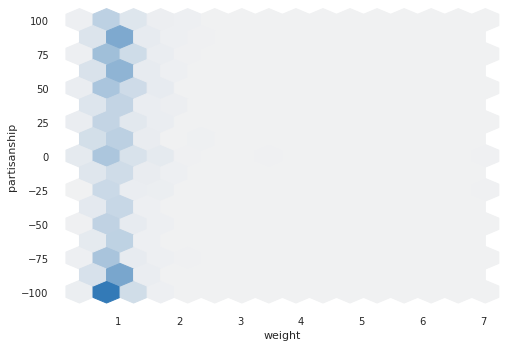

In [21]:
profile = ProfileReport(anes, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=False)
profile.to_notebook_iframe()

## Ways to Understand Relationships
Descriptive statistics are ways to understand characteristics of particular, individual features in the data. But there are different methods to understand the relationship between two features, the choice of which depends on whether the relationship is between two continuous features, between two categorical features, or between one continuous and one categorical feature.

While these methods describe correlations, they do not demonstrate that one feature is a cause for the other. There are many additional criteria we have to take into consideration if we are trying to establish [causal inference](https://en.wikipedia.org/wiki/Causal_inference). That said, these methods work well for EDA as they can reveal meaningful patters that exist in the data.

### Correlations
Relationships between two continuous features can be quantified with a correlation: a number that can be positive, negative, or zero. Positive numbers indicate a positive relationship: the two features tend to increase together or decrease together. Negative numbers indicate a negative relationship: increases in one feature tend to occur with decreases in the other. Zero indicates that there is no discernible relationship. The most common correlation is [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which can take on any real value between -1 and 1. There are other correlation measures, including [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), [Kendall's tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), and [intraclass correlation](https://en.wikipedia.org/wiki/Intraclass_correlation). There are subtle differences between these measures, but here we will focus on Pearson's coefficient.

To calculate the correlation between two features, isolate the two columns and apply the `.corr()` method. Here we can measure the correlation between Biden and Trump's thermometer ratings:

In [22]:
anes[['fttrump', 'ftbiden']].corr()

,fttrump,ftbiden
fttrump,1.000000,-0.646357
ftbiden,-0.646357,1.000000


The `.corr()` method produces a symmetric matrix with 1s on the diagonal (indicating that each feature is perfectly correlated with itself), and the correlation between the two features in the off-diagonal elements. In this case, the correlation is negative, meaning that the more highly a person rates Biden, the lower they rate Trump, and vice versa.

To display the correlations for more than two features, pass more columns to the `.corr()` method. If we use `.loc` to select all of the feeling thermometer features, then `.corr()` places all the correlations in a symmetric matrix as follows:

In [23]:
anes.loc[:,'fttrump':'ftimmig'].corr()

,fttrump,ftobama,ftbiden,ftwarren,ftsanders,ftbuttigieg,ftharris,ftblack,ftwhite,fthisp,...,ftbritain,ftgermany,ftjapan,ftisrael,ftfrance,ftcanada,ftturkey,ftrussia,ftpales,ftimmig
fttrump,1.000000,-0.754178,-0.646357,-0.699664,-0.678443,-0.588964,-0.616295,-0.088143,0.240802,-0.128286,...,-0.021959,-0.266252,-0.032216,0.431513,-0.363577,-0.273404,-0.044590,0.242000,-0.378096,-0.088958
ftobama,-0.754178,1.000000,0.805100,0.783064,0.720092,0.714641,0.743463,0.222713,-0.096177,0.223919,...,0.139026,0.329477,0.106416,-0.292210,0.448712,0.342440,0.187500,-0.117613,0.430379,0.177041
ftbiden,-0.646357,0.805100,1.000000,0.733601,0.664075,0.728557,0.730069,0.171006,-0.028490,0.171773,...,0.181856,0.324174,0.104006,-0.210108,0.433085,0.346677,0.201423,-0.093490,0.406408,0.136857
ftwarren,-0.699664,0.783064,0.733601,1.000000,0.798636,0.706680,0.799202,0.224285,-0.086150,0.241548,...,0.142118,0.362469,0.133061,-0.274250,0.462700,0.352000,0.199888,-0.095917,0.503494,0.185739
ftsanders,-0.678443,0.720092,0.664075,0.798636,1.000000,0.612547,0.695092,0.178376,-0.097548,0.203581,...,0.105691,0.317619,0.117220,-0.301007,0.423979,0.307537,0.222943,-0.020067,0.465069,0.133447
ftbuttigieg,-0.588964,0.714641,0.728557,0.706680,0.612547,1.000000,0.736301,0.161853,-0.022885,0.183849,...,0.216310,0.413393,0.166988,-0.188748,0.471103,0.365010,0.211182,-0.051666,0.463869,0.169029
ftharris,-0.616295,0.743463,0.730069,0.799202,0.695092,0.736301,1.000000,0.215413,-0.074303,0.222411,...,0.147331,0.360846,0.138585,-0.218450,0.450358,0.322747,0.233789,-0.032494,0.486032,0.165644
ftblack,-0.088143,0.222713,0.171006,0.224285,0.178376,0.161853,0.215413,1.000000,0.434286,0.723005,...,0.331453,0.289326,0.347317,0.257312,0.315790,0.307676,0.180295,0.042982,0.252483,0.537916
ftwhite,0.240802,-0.096177,-0.028490,-0.086150,-0.097548,-0.022885,-0.074303,0.434286,1.000000,0.416440,...,0.347429,0.236740,0.298695,0.346157,0.184578,0.253947,0.121547,0.149674,0.038458,0.309098
fthisp,-0.128286,0.223919,0.171773,0.241548,0.203581,0.183849,0.222411,0.723005,0.416440,1.000000,...,0.380352,0.363587,0.422253,0.258848,0.372019,0.385854,0.217107,0.089296,0.285451,0.645328


### Conditional Means and Other Statistics
The best way to describe the relationship between a categorical feature and a continuous one is with a conditional means table: a table with one row for every category with a column for the means of the observations within each category. We created tables exactly like this with `.groupby()` while performing data aggregation in module 8, so we can employ the same code here. In addition to conditional means, we can include other conditional statistics as well.

For example, to see the relationship between party affiliation and the Biden thermometer ratings, we can construct a table to display these conditional means: 

In [24]:
anes.groupby('partyID').agg({'ftbiden':'mean'}).round(2)

,ftbiden
partyID,
Democrat,66.38
Independent,35.26
Republican,18.82


So Democrats rate Biden 66.38, on average, independents rate Biden 35.26, and Republicans rate Biden 18.82. So there is a clear relationship between party affiliation and Biden thermometer ratings. We can include additional descriptive statistics in this table, such as the median and 25th and 75th percentiles. Because `.agg()` does not have a shortcut to the quantile function, we first create functions for the 25th and 75th percentiles ourselves and pass these function to `.agg()`: 

In [25]:
def q25(x): return x.quantile(0.25)
def q75(x): return x.quantile(0.75)
anes.groupby('partyID').agg({'ftbiden':['mean', 'median', q25, q75]}).round(2)

ftbiden                   
               mean median   q25   q75
partyID                               
Democrat      66.38   70.0  50.0  88.0
Independent   35.26   33.0   6.0  53.0
Republican    18.82    8.0   1.0  31.0

We can include more than one continous feature in the table by adding entries to the dictionary we pass to `.agg()`. Here we can add the Trump thermometer in addition to the Biden thermometer:

In [26]:
anes.groupby('partyID').agg({'ftbiden':['mean', 'median', q25, q75],
                            'fttrump':['mean', 'median', q25, q75]}).round(2)

ftbiden                    fttrump                     
               mean median   q25   q75    mean median    q25    q75
partyID                                                            
Democrat      66.38   70.0  50.0  88.0   11.21    2.0   0.00    7.0
Independent   35.26   33.0   6.0  53.0   40.89   37.0   2.50   73.5
Republican    18.82    8.0   1.0  31.0   82.36   94.0  74.75  100.0

We can see simple relationships such as the average age of people who have and who have not attended protests:

In [27]:
anes.groupby('protest').agg({'age':'mean'}).round(2)

,age
protest,
False,52.33
True,48.03


### Cross-Tabulations
A cross-tab describes the relationship between two categorical features. The categories of one feature comprise the rows, and the categories of the other feature comprise the columns, and the cells contain a statistic (often the frequency) calculated from the subset of rows that have the specific values for the two categorical features.

There are a few different ways to create a cross-tab in Python, but the easiest and best way uses the `pd.crosstab()` function, which takes two arguments: the feature whose categories define the rows, and the feature whose categories define the columns. For example, to analyze the relationship between options on universal basic income and political ideology, we can create a cross-tab with categories of `universal_income` in the rows and categories of `ideology` in the columns:

In [28]:
pd.crosstab(anes.universal_income, anes.ideology)

ideology,Conservative,Liberal,Moderate
universal_income,,,
Favor a great deal,55,200,102
Favor a little,72,129,114
Favor a moderate amount,46,154,102
Neither favor nor oppose,135,181,241
Oppose a great deal,717,55,219
Oppose a little,46,55,76
Oppose a moderate amount,82,46,73


Notice that the categories for each feature are listed in alphabetical order. That's the default behavior when columns are coded as an `object` data type. But in this case we want to reorder the categories from least to most support for a universal basic income, and from liberal to conservative with moderate in the middle. To reorder categories, we first change each column to a category data type:

In [29]:
anes['universal_income'] = anes['universal_income'].astype('category')
anes['ideology'] = anes['ideology'].astype('category')

Then we can use the `.cat.reorder_categories()` method to place the categories in the order in which we want to list them in the table:

In [30]:
anes['universal_income'] = anes['universal_income'].cat.reorder_categories(['Oppose a great deal',
                                                                       'Oppose a moderate amount',
                                                                       'Oppose a little',
                                                                       'Neither favor nor oppose',
                                                                       'Favor a little',
                                                                       'Favor a moderate amount',
                                                                       'Favor a great deal'])
anes['ideology'] = anes['ideology'].cat.reorder_categories(['Liberal','Moderate','Conservative'])
pd.crosstab(anes.universal_income, anes.ideology)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppose a great deal,55,219,717
Oppose a moderate amount,46,73,82
Oppose a little,55,76,46
Neither favor nor oppose,181,241,135
Favor a little,129,114,72
Favor a moderate amount,154,102,46
Favor a great deal,200,102,55


Raw counts are not always the most informative statistic to place within the cells. We can convert these counts to percents. There are three kinds of percent statistics: row percents, which calculate the quotient of the count to the row total, column percents, which calculate the quotient of the counts to the column total, and cell percents, which calculate the quotient of the count to the overall total. The choice of percent leads to a different interpretation of the table. For example, to display the row percents instead of counts, use the `normalize='index'` argument. If we want, we can multiply the result by 100 to display percents instead of proportions and we can round to 2 decimal places: 

In [31]:
(pd.crosstab(anes.universal_income, anes.ideology, normalize='index')*100).round(2)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppose a great deal,5.55,22.10,72.35
Oppose a moderate amount,22.89,36.32,40.80
Oppose a little,31.07,42.94,25.99
Neither favor nor oppose,32.50,43.27,24.24
Favor a little,40.95,36.19,22.86
Favor a moderate amount,50.99,33.77,15.23
Favor a great deal,56.02,28.57,15.41


Because these are row percents, the numbers on each row add to 100. The first row is interpreted as follows: of the people who oppose a universal basic income a greal deal, 72.35% are conservative, 22.1% are moderate, and 5.55% are liberal.

To display column percents, we use the `normalize='columns'` argument:

In [32]:
(pd.crosstab(anes.universal_income, anes.ideology, normalize='columns')*100).round(2)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppose a great deal,6.71,23.62,62.19
Oppose a moderate amount,5.61,7.87,7.11
Oppose a little,6.71,8.20,3.99
Neither favor nor oppose,22.07,26.00,11.71
Favor a little,15.73,12.30,6.24
Favor a moderate amount,18.78,11.00,3.99
Favor a great deal,24.39,11.00,4.77


Here, the numbers in each column add to 100. The first row now has a different interpretation: 6.71% of liberals, 23.62% of moderates, and 62.19% of conservatives oppose a universal basic income a great deal.

To display cell percents, we use the `normalize=True` argument:

In [33]:
(pd.crosstab(anes.universal_income, anes.ideology, normalize=True)*100).round(2)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppose a great deal,1.90,7.55,24.72
Oppose a moderate amount,1.59,2.52,2.83
Oppose a little,1.90,2.62,1.59
Neither favor nor oppose,6.24,8.31,4.66
Favor a little,4.45,3.93,2.48
Favor a moderate amount,5.31,3.52,1.59
Favor a great deal,6.90,3.52,1.90


Here all the cells added together add to 100. The first row is now interpreted as: 1.9% of people are liberal and oppose a universal basic income a greal deal, 7.55% of people are moderate and oppose a universal basic income a greal deal, and 24.72% of people are conservative and oppose a universal basic income a greal deal.

We can populate the cells with statistics other than counts and percents. These cells are calculated from a third column, which we specify with the `values` parameter. We use the `aggfunction` parameter to determine the function to apply within each cell; to report the means, we write `aggfunction='mean'`. We can, for example, create a cross-tab with `liveurban` (whether the person lives in a city, a rural area, a suburb, or a town) and `ideology`, and we can populate the cells with average values of `partisanship`, the difference between Biden's thermometer rating and Trump's thermometer rating: 

In [34]:
pd.crosstab(anes.liveurban, anes.ideology, 
            values=anes.partisanship, aggfunc='mean').round(2)

ideology,Liberal,Moderate,Conservative
liveurban,,,
City,56.66,21.66,-45.38
Rural,46.16,6.45,-64.23
Suburb,55.42,21.39,-63.63
Town,52.12,19.71,-63.97


People who live in cities and are liberal rate Biden 56.66 points higher than Trump on average, and people who are conservative and live in suburbs rate Trump 63.63 points higher than Biden on average.

### Hypothesis Tests
Most people, when they first start learning statistics, learn about hypothesis testing in their very first course. Learning hypothesis testing so early also means that, for many people, their first course on statistics is their last course on statistics. Hypothesis tests can seem arbitrary and technical. It's a shame, because these tests can be useful tools for exploring a dataset.

Part of the problem is that hypothesis tests have been generally over-emphasized in many fields that apply statistics for data analysis. Relying too much on a hypothesis test can obscure important aspects of relationships in the data and boil everything down to an oversimplified "significant or not" heuristic.

It is better to think of hypothesis tests as ways to measure certainty about what we see regarding relationships and comparisons in the data. When we look at descriptive statistics, correlations, conditional means, or cross-tabs, we can get a sense of how features in the data relate to one another on average, but we do not get a sense of how much variability exists around these effects. A hypothesis test provides a clear statement about whether enough evidence exists in the data for us to conclude that a relationship is real and not simply a byproduct of randomness. 

There are different hypothesis tests for different situations. A $t$-test is useful for comparing the means of two columns in a dataframe, or for testing whether the mean of a column varies across groups in the dataframe. An ANOVA with an $f$-statistic is useful for comparing the means of several columns at once. A $\chi^2$ (chi-square) test of association helps us see whether the frequency of categories for one feature depends on the category of another feature. For each test, we calculate a $p$-value that helps us draw a conclusion about the whether we have enough evidence to conclude that some effect or difference exists.

Here's how hypothesis tests work:

Suppose that I grab a soapbox and place it in the middle of Times Square in New York City, and I hop on to it, lift a megaphone to my mouth, and yell

<div style="text-align:center"><span style="color:red; font-family:Georgia; font-size:1.5em;">CATS ARE JUST SMALL DOGS</span></div>

Suppose for a moment that this insane thing to say is actually true. Then think about how cats and dogs behave in the real world. How compatible is the real world behavior of cats and dogs with the assertion that cats are small dogs? For one, cats like to sit on windowsills, while dogs seldom have the patience to sit on a windowsill for very long. In that way, if cats are small dogs, then cats are very unusual dogs. Also, dogs like to fetch and they respond when we call them by name. I've never seen a cat that would fetch or react at all to its name. In that way, again, if cats are small dogs, then cats are very peculiar dogs. We are left with one of two conclusions. Either cats are randomly the strangest collection of dogs in the world, or the initial assumption that cats are small dogs was wrong.

Hypothesis testing follows the exact same logic. First we make an assumption about the data. Then we look at the data to see how compatible the data are with that assumption. If the data are not very compatible with the assumption, then we either conclude that our particular sample is a very unlikely draw, or that our initial assumption is false.

The initial assumption is called a **null hypothesis**. Based on what we see in the data, we will conclude either that the null hypothesis is wrong, or that our sample isn't big enough or different enough from the population to conclude that the null hypothesis is wrong. We don't use hypothesis tests to conclude that the null hypothesis is true. For example, suppose that when I observe the behavior of cats and dogs, I see some cats that behave like this:

In [35]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/3f_h0rxhD9I", width="560", height="315")

Having observed some adorable cats acting like dogs, I don't have enough evidence that cats are all that different from dogs. So I don't reject the assumption that cats are small dogs. But at the same time, I don't accept that cats are small dogs as truth. I leave the door open to either possibility because the evidence is mixed.

In statistical hypothesis testing, our null hypotheses are statements that there is no relationship between two features, or that there is no difference between quantities we are examing. We start by assumming the null hypothesis is true. Then we calculate a descriptive statistic called a **test statistic** that describes the relationship or comparison described in the null hypothesis. If the test statistic is large enough, we reject the null hypothesis that there is no relationship or that the features have equal means. If the test statistic is not large enough, or if there isn't much data, we would fail to reject the null hypothesis, leaving the door open to the null hypothesis being true or false.

#### Understanding What $p$-Values Mean and Don't Mean
A $p$-value is: **the probability that a test statistic could be as extreme as it is in the sample under the assumption that the null hypothesis (no relationship, equal means, etc.) is true.**

For example, suppose we have a random sample of cats and dogs and for each cat and dog we measure the number of minutes each day the cat or dog spends resting on the windowsill. Across the entire sample, we find that cats spend 60 more minutes a day on the windowsill than dogs on average. Here the difference of 60 is our test statistic. Now suppose that the null hypothesis that cats are small dogs is true. Under this assumption, cats and dogs should spend an equal amount of time on the windowsill on average. In any given random sample, however, we might observe some differences between these averages. We can **calculate the probability that the difference could be 60 or larger** due to a randomly drawn sample. If this probability is really low then we can conclude that the difference cannot be due to an odd draw for our random sample of cats and dogs, and if the difference isn't due to sampling variation, then it must be due to a real-life difference between cats and dogs. Then we reject the initial null hypothesis and conclude that cats are not small dogs.

How small should the probability be before we reject the null hypothesis? There are commonly used cutoffs in different fields. The most commonly used standard is $p < 0.05$, but some fields require more stringent standards like $p < 0.01$ or smaller. If a $p$-value is less than the cutoff we use, then we say that a hypothesis test yields a **statistically significant** result. Statistical significance means only that we have enough evidence to reject the null hypothesis, nothing more. 

A **two-tailed test** (no pun intended with the cats and dogs example) allows for the possibility that the test statistic can be positive or negative. In the example, if we have no reason to expect cats or dogs to sit on the windowsill for longer, then we can consider both the situation in which cats sit on the windowsill more than dogs, and the situation in which dogs sit on the windowsill more than cats. Our $p$-value will be the probability that the test statistic, the average difference, could be greater than or equal to 60 if cats sit longer than dogs, or less than or equal to -60 if dogs sit longer than cats. In formal mathematical notation, let $t$ be the average difference: the two-tailed $p$-value in this example is
$$ p = Pr(|t| \geq 60) = Pr(t \leq -60 \text{ or } t \geq 60).$$

A **one-tailed test** only considers the possibility of extremity in only one direction. We might be willing to entertain the possibility that cats sit on the windowsill longer than dogs, but not the possibility that dogs sit longer than cats. If this is the case, we calculate the probability that the difference is greater than 60 in a random sample, assuming that there is no difference in the population of cats and dogs, but we do not calculate the probability that the difference is less than -60. The formal definition of the $p$-value in this case is
$$ p = Pr(t \geq 60).$$
In practice, a one-tailed test means that we require less evidence in order to reject the null hypothesis. If we already expect cats to sit longer than dogs, then smaller differences will convince us that cats are not small dogs. Two-tailed $p$-values will in general be double the size of a one-tailed value, so if the one-tailed $p$-value is .03 the two-tailed $p$-value will be .06 which means we would reject the null at the $p<.05$ standard with a one-tailed test, but not with a two-tailed test. 

In the examples below we will use Python code to conduct hypothesis tests and to calculate $p$-values. In a course on mathematical statistics we would calculate these $p$-value by hand, but that is beyond our scope here. We need to know how to run these tests and how to interpret the results.

Interpretation of $p$-values is a big challenge because $p$-values are very commonly misused and misinterpreted in applied statistics. Although the vast majority of published research articles that use statistics use $p$-values as definitive evidence of conclusions, we are currently in the midst of a major pushback against the use of $p$-values in applied research. The American Statistics Association, the main professional organization for the academic field of statistics, published “[The ASA’s Statement on $p$-Values: Context, Process, and Purpose](https://amstat.tandfonline.com/doi/pdf/10.1080/00031305.2016.1154108)” in 2016, which made a compelling argument against the status quo’s use of $p$-values. The field of data science uses $p$-values a great deal less than other disciplines because of these issues and because $p$-values do not tell us much about the predictive accuracy of models.

For us, $p$-values are most useful as ways to conduct EDA. While descriptive statistics show us some basic properties of features and of relationships in the data, hypothesis tests are useful for measuring the strength of evidence that the properties and relationships we see are characteristic of something real, as opposed to generated from randomness in the sample. But it's important not to rely on $p$-values too much. There are a few things to keep in mind about $p$-values before using one to draw a conclusion about a comparison or a relationship in the data:

* $p$-values depend on the size of the sample. The bigger the sample size, in general, the lower the $p$-values. The idea here is that more data equates to more evidence, and with more evidence we are more likely to conclude that any difference in the data is real and not due to an idiosyncratic sample. The amount of data used to conduct the test (after accounting for the number of test statistics we need to estimate) is called the **degrees of freedom** for the test, and $p$-values always decline as the degrees of freedom includes. That means that if we have a lot of data, then all of our test results will be significant! In that case, $p$-values don’t tell us very much at all.

* $p$-values don’t tell us about the size of an effect or about how much of a difference there is between groups. It’s possible to have a very small $p$-value attached to a very small and possibly negligible effect. Don’t confuse low $p$-values with the “strength” of a finding.

* $p$-values don’t demonstrate that one feature causes another. There are a whole lot of other factors that we need to take into consideration to make a statement about causality. 

* If we are doing multiple hypothesis tests, each with a $p$-value, then the probability of a false positive result goes up with the number of tests. Suppose that we do 20 tests, for example, and in each test suppose that the null hypothesis is true (so that we should never reject the null hypothesis). $p=.05$ means that there is a 1 in 20 chance of getting a significant result and rejecting the null hypothesis when we shouldn’t. So, because we conduct 20 tests, we should expect to reject a null hypothesis for one of the tests when we should not do so. XKCD comics illustrates this point with jellybeans:

<figure class="image">
<center>
<img src="https://imgs.xkcd.com/comics/significant.png" width='500'>
<figcaption> XKCD Comics #882, "Significant" (<a href="https://xkcd.com/882/">https://xkcd.com/882/</a>)</figcaption>
</center>
</figure>

#### Comparison of Means Tests
One set of hypothesis tests consider whether the mean of a column differs from a specified value, differs depending on groups in the data, or differs from the mean of another column in the data. Comparing a mean to a pre-specified value is called a **one-sample** $t$-test, comparing the mean across groups is called an **independent samples** $t$-test, and comparing the means of different columns is a **paired** $t$-test. The functions for these hypothesis tests exist in the `stats` module of the `scipy` package. To run a one-sample $t$-test, use `stats.ttest_1samp()`, to run an independent sample $t$-test, use `stats.ttest_ind()`, and to run a paired $t$-test, use `stats.ttest_rel()`.

The mean thermometer rating for Joe Biden is

In [36]:
anes.ftbiden.mean()

42.15189466923571

We might be interested in whether there exists sufficient evidence in the data to conclude that the mean is statistically significantly different from 40. To run a one-sample $t$-test, we type

In [37]:
mytest = stats.ttest_1samp(anes['ftbiden'].dropna(), 40)
mytest

Ttest_1sampResult(statistic=3.5913467876717964, pvalue=0.0003340593853690189)

Note that in the above code we have to use the `.dropna()` method to calculate conduct the test only on the non-missing observations of `ftbiden`. Let's denote the mean Biden thermometer rating in the population as $\mu$. The null hypothesis in this case is
$$H_0: \mu = 40$$
The $p$-value is the probability that a sample of 3,164 observations could have a mean at least 2.152 units away from (greater than or less than, since this is a two-tailed test) 40 if *we assume that the true mean in the population is 40*. Here the $p$-value is .0003, which is quite a bit smaller than the .05 standard we use to reject the null hypothesis. So we say that the mean thermometer rating for Joe Biden is statistically significantly different from 40.

The mean Biden thermometer rating for men and the mean Biden thermometer rating for women are

In [38]:
anes.groupby('sex').agg({'ftbiden':'mean'})

,ftbiden
sex,
Female,44.882759
Male,39.284398


We see a difference between these two conditional means: specifically, women have a rating for Biden that is about 5.2 points higher on average than the ratiings from men. We want to test whether we have enough evidence in the data to reject the idea that these means are equal in the population. Let the mean Biden thermomemter for men is $\mu_m$ and let the mean Biden thermometer for women be $\mu_w$. We will run an independent samples $t$-test in which our null hypothesis is 
$$ H_0: \mu_m = \mu_w $$
To run this test, we first create two new Python variables, one containing the values of `ftbiden` for men, and one containing the values of `ftbiden` for women, removing the missing values from both series:

In [39]:
ftbiden_men = anes.query("sex=='Male'").ftbiden.dropna()
ftbiden_women = anes.query("sex=='Female'").ftbiden.dropna()

To run the independent samples $t$-test, we pass the two series to `stats.ttest_ind()` with the `equal_var=False` option because we cannot assume that the two series have the same variance. The code is:

In [40]:
stats.ttest_ind(ftbiden_men, ftbiden_women, equal_var=False)

Ttest_indResult(statistic=-4.684509884485571, pvalue=2.927022297618164e-06)

Here the $p$-value is about .0000002, which is the probability that under the assumption that men and women approve of Biden equally, on average, that we could draw a sample with a difference between these two means of 4.68 or higher. Because this probability is lower than .05, we can reject the null hypothesis and conclude that there is a statisitically significant difference between men and women in terms of how highly they rate Joe Biden.

Next, suppose that we want to compare the average rating of Trump to the average rating of Biden. These two means, and their difference, are:

In [41]:
{'trump':anes.fttrump.mean(),
'biden':anes.ftbiden.mean(),
'difference':anes.fttrump.mean() - anes.ftbiden.mean()}

{'trump': 43.87000958160332,
 'biden': 42.15189466923571,
 'difference': 1.7181149123676107}

We can use a paired $t$-test to determine whether there is enough evidence in the data to reject the idea that the two candidates have the same mean in the population. Let the mean rating of Trump be $\mu_t$ and let the mean rating of Biden be $\mu_b$. The null hypothesis in this case is
$$ H_0: \mu_t = \mu_b $$
To run this test, we first create a subset of the dataframe that contains only the columns we want to compare, and we remove all rows that are missing on any of these columns:

In [42]:
anes_ttest = anes[['fttrump', 'ftbiden']].dropna()
stats.ttest_rel(anes_ttest['fttrump'], anes_ttest['ftbiden'])

Ttest_relResult(statistic=1.6327284676310017, pvalue=0.10262803725374475)

Then we pass this columns in this subset to the `stats.ttest_rel()` function:

In [43]:
stats.ttest_rel(anes_ttest['fttrump'], anes_ttest['ftbiden'])

Ttest_relResult(statistic=1.6327284676310017, pvalue=0.10262803725374475)

The $p$-value, about 0.1, is the probability that a sample could have produced a difference in means of 1.72 or greater in either direction if the truth is that the columns have the same mean in the population. Because this $p$-value is greater than .05, we fail to reject the null hypothesis that the two candidates have the same average thermometer rating. 

Please note, failing to reject the null hypothesis is NOT the same thing as accepting the null hypothesis. We cannot conclude from this test result that Trump and Biden have the same average rating. We just don't have enough evidence to rule out that possibility. The thermometers might be the same or different.

#### Tests of Multiple Comparisons
In the previous section, we compared the mean of one column in the dataframe as it differs across two distinct groups in the data. We can also compare the mean as it differs across *more than two* groups. For example, we can look at the average age of Democrats, independents, and Republicans:

In [44]:
anes.groupby('partyID').agg({'age':'mean'})

,age
partyID,
Democrat,50.734894
Independent,48.705104
Republican,56.350877


If we wanted to compare Democrats to Republicans, Democrats to independents, or Republicans to independents, we can use `stats.ttest_ind()` to make these comparisons. But suppose we wanted to compare all three at once. Let $\mu_d$ be the average age of Democrats, $\mu_i$ be the average age of independents, and $\mu_r$ be the average age of Republicans. The null hypothesis we want to assess is 
$$ H_0: \mu_d = \mu_i = \mu_r $$
Another way to write the null hypothesis is as three hypotheses that we assess simultaneously:
$$ H_0^1: \mu_d = \mu_i$$
$$ H_0^2: \mu_d = \mu_r$$
$$ H_0^3: \mu_i = \mu_r$$
The multigroup analogue to an independent samples $t$-test is an Analysis of Variance (ANOVA) test, which calculates an $f$-statistic. The more exists across specified groups relative to within these groups, the higher the $f$-statistic is. An ANOVA will generate a $p$-value that represents the probability that an $f$-statistic of the calculated size could be generated from a random sample assumming that the groups all have equal means. If even one group has a different enough mean from the others, then the $f$-statistic will be large, and the associated $p$-value will be low. 

To run an ANOVA test in Python, uwe can se the `stats.f_oneway()` function. We pass the three series that we want to compare to the function by using `.query()` to select the rows that match each group, dropping missing values for each series. To test whether Democrats, independents, and Republicans have the same age, on average, we type:

In [45]:
stats.f_oneway(anes.query("partyID=='Democrat'").age.dropna(),
               anes.query("partyID=='Independent'").age.dropna(),
               anes.query("partyID=='Republican'").age.dropna())

F_onewayResult(statistic=52.588970634465824, pvalue=3.517577203359592e-23)

The $p$-value is very small, and much smaller than .05, so we reject the null hypothesis that the three groups have the same average age.

#### Tests of Association
We can use a hypothesis test to assess whether two categorical features have a relationship. Previously we discussed the technique of a cross-tabulation that places the categories of one feature on the rows, the categories of a second feature in the columns, and fills each cell with a summary statistic like the count of rows with each combination of categories. Here is the cross-tab for support for a universal basic income and political ideology:

In [46]:
pd.crosstab(anes.universal_income, anes.ideology)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppose a great deal,55,219,717
Oppose a moderate amount,46,73,82
Oppose a little,55,76,46
Neither favor nor oppose,181,241,135
Favor a little,129,114,72
Favor a moderate amount,154,102,46
Favor a great deal,200,102,55


A hypothesis test here poses the question of whether the distribution across columns depends on the row, or equivalently, whether the distribution across the rows depends on the column. It doesn't test whether the raw counts are equal across rows and columns, but rather whether the row percents are equal on each row or whether the column percents are equal on each column. The column percents, for example, are:

In [47]:
(100*pd.crosstab(anes.universal_income, anes.ideology, normalize='columns')).round(2)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppose a great deal,6.71,23.62,62.19
Oppose a moderate amount,5.61,7.87,7.11
Oppose a little,6.71,8.20,3.99
Neither favor nor oppose,22.07,26.00,11.71
Favor a little,15.73,12.30,6.24
Favor a moderate amount,18.78,11.00,3.99
Favor a great deal,24.39,11.00,4.77


At first glance, there is a lot of variation from column to column. Conservatives overwhelmingly oppose a universal basic income, with 62.2% of conservatives stating that they oppose a universal basic income a great deal. Only 6.7% of liberals, in contrast, oppose a universal basic income a great deal. 

A hypothesis test can tell us whether these differences are strong enough for us to conclude that there is a real relationship between the rows and columns of this cross-tab, or in this case, whether there are ideological differences in support for a universal basic income. The hypothesis test that judges the strength of a relationship between two categorical features is a **$\chi^2$ (chi-square) test of association**. To run a $\chi^2$ test, first save the cross-tab as a separate Python variable:

In [48]:
crosstab = pd.crosstab(anes.universal_income, anes.ideology)

Then pass this crosstab to the `stats.chi2_contingency()` function:

In [49]:
stats.chi2_contingency(crosstab.values)

(849.5464372904162,
 3.8910750579483107e-174,
 12,
 array([[280.2137931 , 316.77827586, 394.00793103],
        [ 56.83448276,  64.25068966,  79.91482759],
        [ 50.04827586,  56.57896552,  70.37275862],
        [157.49655172, 178.04793103, 221.45551724],
        [ 89.06896552, 100.69137931, 125.23965517],
        [ 85.39310345,  96.53586207, 120.07103448],
        [100.94482759, 114.11689655, 141.93827586]]))

The $p$-value is the second value listed, `3.89e-174`, which is very, very small and much less than .05. The $p$-value represents the probability that a cross-tab with row-by-row (or column-by-column) differences as extreme as the ones we see can be generated by a random sample if we assume that these two features are independent in the population so that the row percents should be constant across rows (and column percents should be constant across columns). Because the $p$-value is so small, we reject this null hypothesis and conclude that there is a statistically significant relationship between ideology and support for a universal basic income.

#### Correlations with $p$-Values
We generated a matrix of Pearson's correlation coefficient for pairs of continuous-valued features in the data with the `.corr()` method. Each of these correlations exists on the scale of -1 to 1, where -1 represents a completely linear negative relationship, 1 represents a completely linear positive relationship, and 0 represents no discernible relationship. 

We might want to use a hypothesis test to confirm that a correlation is not equal to 0, which would let us conclude that two features are correlated to some nonzero extent. Let $\rho$ represent a Pearson's correlation coefficient. For this test the null hypothesis is 
$$ H_0: \rho=0$$

To generate a correlation with an associated $p$-value, we can create a subset of the dataframe that contains only the columns that we want to correlate, remove any row with a missing value from this subset, and pass this subset to the `stats.pearsonr()` function. For example, to calculate the correlation between the Biden and Trump thermometers with a $p$-value, we type:

In [50]:
anes_corr = anes[['fttrump', 'ftbiden']].dropna()
stats.pearsonr(anes_corr['fttrump'], anes_corr['ftbiden'])

(-0.6463572448004329, 0.0)

The first number is the correlation coefficient, which is -.65. The negative number means that the more highly someone rates Trump, the lower they tend to rate Biden, which is not surprising. The $p$-value is the second number, which is so small that it rounds to 0 over 16 decimal places. The $p$-value is the probability that a random sample could produce a correlation as extreme as .65 in either direction assuming that the correlation is 0 in the population. Because the $p$-value is so small, we reject the null hypothesis that these two features are uncorrelated and we conclude that there is a nonzero correlation between the Biden and Trump thermometers.

Please note that the fact that the $p$-value is very small cannot be interpreted beyond the fact that it is less than .05. A correlation does not become stronger just because the $p$-value is smaller. Beyond concluding that a correlation is nonzero, we must look to the correlation coefficient itself to draw substantive conclusions about this relationship. 

## Measurement Models
Statistical models have three uses: they can be used for prediction, they can be used to test theories and access causality, and they can be used to measure concepts that underlie the observed data. An underlying concept that we measure is called a **latent feature**. The idea is that the observed features change in response to changes in the latent feature, and we can reconstruct values of the latent feature from the shared correlation of the observed features.

For example, in psychological studies, we might want to know the level of depression that each participant in the study is experiencing. We start by assuming that depression is a quantifiable and measurable concept (which is a matter of debate, but an assumption we generally must make in order to conduct quantitative research regarding a concept like depression). Depression is not something we can directly observe however, so we collect data on observable implications of degression, such as whether the participant has trouble sleeping, whether they are experiencing fatigue or a lack of interest in their hobbies, and so on. We then construct a measurement of depression from the observed features using an algorithm that maximizes the total correlation between the observed features and the latent feature.

We can accomplish three tasks with a measurement model:

1. We can generate a measurement of latent features.
2. We can describe the latent features in plain-spoken language.
3. And we can examine how strongly each observed feature is associated with the latent features.

The first purpose, generating a measurement, is used frequently in machine learning for reducing the feature space. If we have 100 features and we extract the 10 latent features that underlie the shared correlation of the 100 features, then we can run models using the measures of the 10 latent features instead of the 100 observed ones, reducing the complexity and computational burden of running a model.

The second purpose, describing the latent features, is important for projects that aim to create indices of concepts that are otherwise hard to measure. This step is not statistical, but theoretical. The measurement models can extract numbers, but the models cannot generate names for the latent features. We must name the features in a way that fits our theory for what underlying concept generates the observed features, and if some but not all of the observed features end up being important for a latent feature, that can change the meaning of the laten feature. For example, suppose that we ask people to tell us their positions on several dozen political issues, and that we are trying to use these responses to generate a measure of each person's left-right ideological position. Suppose that when we extract a latent feature, all of the economic issues are highly weighted in creating this measure, and all of the social issues are weighted much less. In this case, the latent feature is "economic ideology" instead of "ideology" and we have to be careful to name the feature correctly.

The third purpose, seeing how the observed features correlate with the latent features, is not only important for naming the latent features but also for EDA. If we can see which features combine to generate the same latent feature, then we can see which observed features are giving us similar information. 

There are many measurement models, but here we will focus on multidimensional scaling (MDS) and principal components analysis (PCA) for continuous-valued observed features, and on multiple correspondence analysis (MCA) for categorical observed features. The following discussion does not delve into the mathematical construction of the models, or into the assumptions that must be made to generate the best possible index for an underlying concept. Instead, we will focus on how these methods can be effective tools for EDA.

### Multidimensional Scaling
Multidimensional scaling (MDS) is a method that involves two steps. First, we take the features in the dataframe that we will to construct the measurement, and we calculate the **distance** (often the Euclidean distance) between every pair of rows across the columns, or between every pair of columns across the rows. We store these distances in a symmetric matrix.

For example, let's extract all of the feeling thermometer features from `anes`. To handle missing values, we delete any row that has one or more missing values with the `.dropna()` method. We can also extract the column names and strip "ft" off of each name with `.str[2:]`:

In [51]:
anes_ft = anes.loc[:,'fttrump':'ftimmig'].dropna()
names = anes_ft.columns.str[2:]

Let $X_1$ and $X_2$ be two distinct series with $N$ elements, and let $x_{i,1}$ and $x_{i,2}$ refer to the $i$th element of each series. The Euclidean distance $d$ between $X_1$ and $X_2$ is 
$$ d = \sqrt{\sum_{i=1}^N (x_{i,1} - x_{i,2})^2}.$$

We have a choice: we can either calculate the distance between every pair of rows in `anes_ft` or between every pair of columns in `anes_ft`. If we calculate the distance between rows, then we will be measuring values of the latent features for every person who gave answers to these questions in the data. If we calculate the distance between columns, we will be measuring values of the latent features for every entity/politician that people rate. Here, for the purpose of understanding which columns are most similar to each other, I choose to calculate the distance between the columns. 

We can use the `metrics.euclidean_distances()` function from the `scipy.metrics` module to calculate Euclidean distances. To perform these calculations between columns, we need to transpose the `anes_ft` dataframe with the `np.transpose()` function:

In [52]:
ft_distance = metrics.euclidean_distances(np.transpose(anes_ft))
pd.DataFrame(ft_distance).iloc[0:4,0:4]

,0,1,2,3
0,0.000000,3924.396387,3604.011376,3694.607151
1,3924.396387,0.000000,1247.812887,1380.286564
2,3604.011376,1247.812887,0.000000,1279.112192
3,3694.607151,1380.286564,1279.112192,0.000000


The distance matrix has 34 rows and 34 columns because there are 34 feeling thermometer features. The diagonal contains 0s because each feature has distance 0 to itself. The first feature in the data refers to Trump's thermometer ratings and the second feature refers to Obama's rating, as these were the first two columns in `anes_ft`, and the Euclidean distance between Obama and Trump is 3924.4 across all of the rows in `anes_ft`.

After calculating the distance matrix, the second step is to run the multidimensional scaling algorithm. The goal of the algorithm is to choose two coordinates for each of the 34 features such that if we plot these coordinates, the distance between points will be as close as possible to the distances in `ft_distance`. To run the multidimensional scaling algorithm, we use the `manifold.MDS()` function from the `scipy.manifold` module. We specify `n_components=2` to extract two coordinates for every feature, and we write `dissimilarity='precomputed'` to tell the function that we have already calculated Euclidean distances:

In [53]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')

Then we pass the distance matrix we calculated to the `.fit()` method of the `mds` output:

In [54]:
mds_fit = mds.fit(ft_distance)

These coordinates are stored in the `.embedding_` attribute:

In [55]:
pos = mds_fit.embedding_
pos

array([[-2.51347204e+03,  8.44058207e+02],
       [ 1.68129681e+03, -5.96369438e+02],
       [ 1.60741164e+03,  7.48143558e+01],
       [ 1.60205268e+03,  3.96986183e+02],
       [ 1.61353668e+03,  6.54494287e+02],
       [ 1.09978068e+03,  7.83814456e+02],
       [ 1.16683739e+03,  1.03674153e+03],
       [-5.23062591e+02, -1.52467896e+03],
       [-1.21974998e+03, -1.15179662e+03],
       [-2.94822507e+02, -1.36103316e+03],
       [-6.69927332e+02, -1.31765475e+03],
       [ 5.58871309e+02, -2.31801528e+02],
       [ 1.03186435e+03,  3.91173068e+02],
       [ 1.23973827e+03, -4.85701231e+02],
       [ 6.71694906e+02, -8.41321772e+02],
       [ 1.05187469e+03, -2.99514695e+02],
       [-2.00625191e+03,  1.63877867e+02],
       [-2.03669857e+03,  8.99084690e+02],
       [ 1.48960382e+00,  1.05745020e+03],
       [-4.26449364e+01,  2.03746274e+03],
       [ 1.87338923e+01, -1.57815937e+02],
       [-4.21135064e+02,  1.39834894e+03],
       [-3.84703170e+02,  1.64125703e+02],
       [ 4.

The two coordinates are measures of two latent features. We can use these features to reduce the feature space, or we can try to understand what these numbers represent. The best way to understand the measurements is to plot the points and label them with the name of each feature. The code that generates that graphic is as follows:

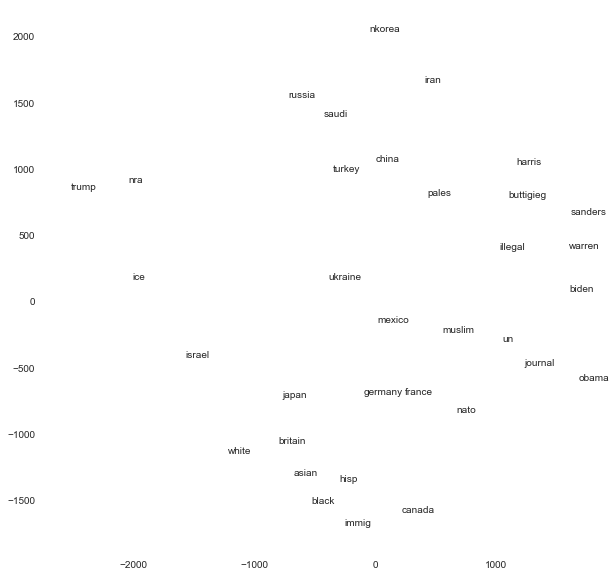

In [56]:
plt.rcParams["figure.figsize"]=10,10
plt.scatter(pos[:, 0], pos[:, 1], color='navy', s=0)
for i in enumerate(names):
    plt.annotate(i[1], (pos[i[0],0], pos[i[0],1]))
plt.show()

I love this figure for EDA because it represents a map of politics according to a representative sample of adults in the United States as of December 2019. On this map, entities that are closer together have smaller Euclidean distances, which indicates that they are rated in similar ways. Notice that the Democratic candidates for president, Biden, Sanders, Warren, Buttigieg, and Harris are all very close together. Obama is also close to that cluster of Democrats. Trump is about as far from these candidates as possible. But even more interesting is where non-politican entities are plotted relative to the politicians. Trump is closest to the NRA, a gun-manufacturing lobbying group, and to ICE, the federal immigration law enforcement agency. The Democrats are close to the United Nations, to the NATO alliance, to journalists, and to illegal immigrants. The racial groups, white, black, Asian, and Hispanic are close to each other and to immigrants. Among countries, there are two main groupings: one includes Canada, France, Britain, Germany, France, and Mexico, and the other includes China, Turkey, Iran, Saudi Arabia, Russia, and North Korea. Israel and Palestine are more distant from other countries and very distant from each other. Ukraine is right in the middle.

This graph helps us understand similarities between features. Knowing that the United Nations is close to the Democrats and far from Trump helps us to understand the viewpoints towards the U.N. in the American electorate. 

One remaining question is what do the axes in the above graph represent? Because multidimensional scaling is primarily concerned with distance, the axes are arbitrary, and we can rotate them to derive meaning. One axis, I think, should be drawn from Trump to Obama, and the other axis should be perpendicular to the first one, intersecting near Ukraine. The Trump-Obama axis might represent a traditional left-right political axis, as it is understood in light of the Trump administrations actions and positions as of December 2019. The other axis, I think, represents general favorability/unfavorability outside of politics according to Americans. The racial groups, along with the European countries and Japan are considered favorably, and the other countries such as Russia, China, and Iran are countries that have had conflicts with the United States and are thus viewed more unfavorably across the political spectrum.

### Principal Component Analysis
Principal components analysis (PCA) is simialr to multidimensional scaling in that both work with continuous-valued features and both generate measures of latent features. But while multidimensional scaling focuses on distance or dissimilarity, PCA considers the correlation between features.

An important property of PCA is that we can extract both latent features and **factor loadings** that describe how each observed feature correlates with the latent feature. We can examine the factor loadings to understand what each latent feature represents. The loadings also show us which observed features load on the same latent feature, which helps us understand the features that have a shared correlation and may represent the same underlying concept.

To run a PCA, create a subset of the data that contains the continuous-valued features and remove rows with missing values, as we did with `anes_ft`. Then use the `prince.PCA()` function from the `prince` package. Setting `n_components=2` calculates two latent features from the observed features. Specifying `rescale_with_mean=True` and `rescale_with_std=True` instructs `prince.PCA()` to calculate z-score standardized versions of every feature first, which ensures that we analyze the correlations between observed features and not covariances. We then use the `.fit()` method to apply the PCA model to our data. The code to run the PCA is:

In [57]:
pca = prince.PCA(
     n_components=2,
     rescale_with_mean=True,
     rescale_with_std=True
)
pca = pca.fit(anes_ft)

To extract the latent features for each of the rows in the `anes_ft` data, use the `.transform()` method:

In [58]:
pca.transform(anes_ft)

,0,1
1,-1.804454,-3.085874
2,0.768833,4.789855
3,4.152857,0.600650
4,1.778356,-3.757302
5,-3.251629,-1.002078
...,...,...
3160,3.723135,-2.075584
3161,1.463445,1.716073
3162,-2.757022,-4.174876
3163,-1.608374,3.397600


These two latent features can be used instead of the 34 feeling thermometer features in subsequent predictive models to reduce the comlexity of the model. But to understand what these features represent, we need to use the `.column_correlations()` method. First we sort by the values of the first latent feature:

In [59]:
loadings = pca.column_correlations(anes_ft)
loadings.columns = ['dim1', 'dim2']
loadings.sort_values('dim1')

,dim1,dim2
ftjournal,-0.830682,0.225884
ftun,-0.817509,0.169747
ftillegal,-0.811237,0.137008
ftobama,-0.804786,0.376683
ftwarren,-0.804091,0.360558
ftharris,-0.774592,0.292578
ftmuslim,-0.769883,-0.099407
ftbiden,-0.752664,0.319840
ftbuttigieg,-0.750555,0.254973
ftsanders,-0.746146,0.355575


The first feature seems to represent the traditional left-right ideological spectrum. The Democrats, along with the U.N., illegal immigrants, and journalists load most strongly on one side of this index, and Trump, the NRA, and ICE load most strongly on the other side.

Next we sort the values of the second latent feature:

In [60]:
loadings.sort_values('dim2')

,dim1,dim2
ftisrael,0.124992,-0.695917
ftice,0.478175,-0.632288
ftnra,0.550674,-0.613405
ftwhite,-0.104892,-0.582798
ftasian,-0.410437,-0.565740
fttrump,0.685936,-0.561954
ftjapan,-0.415978,-0.542366
ftrussia,-0.071980,-0.494303
ftbritain,-0.429749,-0.493662
fthisp,-0.495543,-0.480106


It is less clear to me what this feature represents. It is clearly associated with left-right political ideology as well, but it seems to emphasize the observed features that represent countries. It appears to partly be an index that identifies the countries.

### Correspondence Analysis
Multiple correspondence analysis (MCA) is very similar to PCA, but it works with categorical observed features instead of continuous-valued ones. Like multidimensional scaling, MCA can be used to generate a map that is an excellent tool for EDA. In this case, the map will show would closely categories of different features correspond to one another.

The first step to run MCA is to create a subset of the data that includes only the categorical features we want to use to measure the latent features. These categorical features may have the `object` data type. Like PCA and multidimensional scaling, we must remove rows with missing values. In our example we can use the following 13 features:

In [61]:
anes_cat = anes[['liveurban', 'vote16', 'vote', 'confecon', 'ideology',
                'partyID', 'universal_income', 'family_separation', 'free_college',
                'forgive_loans', 'race', 'sex', 'education']].dropna()
anes_cat

,liveurban,vote16,vote,confecon,ideology,partyID,universal_income,family_separation,free_college,forgive_loans,race,sex,education
0,Suburb,Someone else,Joe Biden,A little worried,Conservative,Democrat,Favor a moderate amount,Oppose strongly,Favor a moderate amount,Favor a little,Hispanic,Male,High school graduate
1,Suburb,Donald Trump,Donald Trump,A little worried,Conservative,Republican,Oppose a moderate amount,Oppose somewhat,Oppose a little,Oppose a moderate amount,White,Male,Post-graduate
2,Rural,Hillary Clinton,Joe Biden,Extremely worried,Moderate,Democrat,Neither favor nor oppose,Oppose strongly,Oppose a moderate amount,Oppose a great deal,White,Female,High school graduate
3,City,Hillary Clinton,Donald Trump,A little worried,Moderate,Democrat,Neither favor nor oppose,Neither favor nor disagree,Favor a little,Favor a moderate amount,Black,Male,Some college
4,City,Donald Trump,Donald Trump,Not at all worried,Conservative,Republican,Oppose a great deal,Neither favor nor disagree,Oppose a great deal,Oppose a great deal,White,Female,Post-graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,Suburb,Donald Trump,Donald Trump,A little worried,Conservative,Republican,Oppose a great deal,Oppose somewhat,Oppose a moderate amount,Oppose a great deal,White,Male,2-year degree
3160,Town,Donald Trump,Donald Trump,A little worried,Conservative,Republican,Oppose a great deal,Favor somewhat,Oppose a great deal,Oppose a great deal,White,Male,2-year degree
3162,City,Did not vote,Probably will not vote,Very worried,Liberal,Independent,Oppose a great deal,Oppose strongly,Oppose a great deal,Oppose a great deal,Hispanic,Male,2-year degree
3163,Suburb,Did not vote,Joe Biden,Moderately worried,Liberal,Democrat,Favor a moderate amount,Oppose somewhat,Neither favor nor oppose,Oppose a little,Black,Male,No HS diploma


MCA is implemented by the `prince.MCA()` function in the `prince` package. We specify `n_components=2` to generate measures for two latent features, and we apply the `.fit()` method to the output, passing the data to this method:

In [62]:
mca = prince.MCA(
     n_components=2
)
mca = mca.fit(anes_cat)

MCA estimates the latent features for both the rows in the dataframe, and for each individual category of each feature. To generate measurements for the rows, apply the `.row_coordinates()` method to the MCA fit output:

In [63]:
mca.row_coordinates(anes_cat)

,0,1
0,-0.414107,-0.062761
1,0.539159,0.003059
2,-0.376817,0.052886
3,-0.372230,0.292528
4,0.930606,-0.219214
...,...,...
3159,0.835494,-0.153051
3160,0.941298,-0.216098
3162,-0.044564,0.441052
3163,-0.577201,0.568509


As with PCA and multidimensional scaling, these measurements can be used to reduce the feature space in a subsequent predictive model. But to understand the meaning of these indices, we can generate the measurements that are associated with every category, and we can plot these points. To generate this graph, use the `.plot_coordinates()` method:

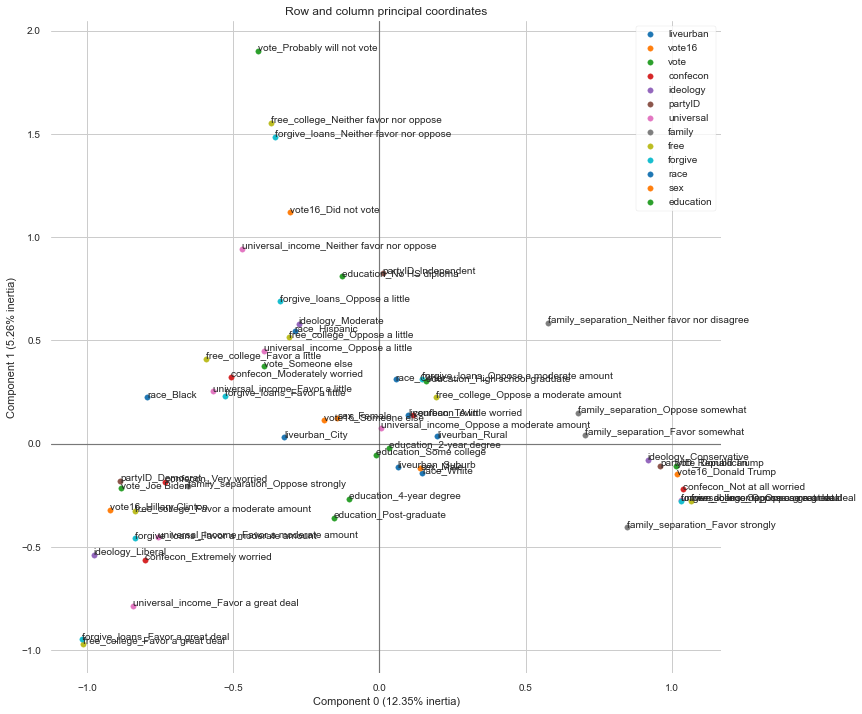

In [64]:
ax = mca.plot_coordinates(
     X=anes_cat,
     ax=None,
     figsize=(12, 12),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=True,
     legend_n_cols=1
 )

To see the values directly, use the `.column_coordinates()` method. Here we can sort the column coordinates by the first dimension:

In [65]:
mca.column_coordinates(anes_cat).sort_values(0)

,0,1
forgive_loans_Favor a great deal,-1.016875,-0.948424
free_college_Favor a great deal,-1.014847,-0.968491
ideology_Liberal,-0.976584,-0.538803
vote16_Hillary Clinton,-0.920940,-0.321173
partyID_Democrat,-0.886805,-0.179326
...,...,...
vote16_Donald Trump,1.015532,-0.148587
universal_income_Oppose a great deal,1.030309,-0.274426
forgive_loans_Oppose a great deal,1.031305,-0.277160
confecon_Not at all worried,1.038713,-0.219560


On one end of the spectrum of the first latent feature we have categories for liberal ideology, voting for Hillary Clinton in 2016, identifying as a Democrat, and supporting free college and educational loan forgiveness a great deal. On the other end we have categories for voting for Trump in 2016, no worry about the economy, and a great deal of opposition to free college, loan forgiveness, and universal basic income. This first latent feature appears to be the left-right ideological dimension.

To understand the meaning of the second feature, we sort by the next column:

In [66]:
mca.column_coordinates(anes_cat).sort_values(1)

,0,1
free_college_Favor a great deal,-1.014847,-0.968491
forgive_loans_Favor a great deal,-1.016875,-0.948424
universal_income_Favor a great deal,-0.844009,-0.786340
confecon_Extremely worried,-0.801452,-0.561893
ideology_Liberal,-0.976584,-0.538803
...,...,...
universal_income_Neither favor nor oppose,-0.468033,0.943652
vote16_Did not vote,-0.305585,1.122217
forgive_loans_Neither favor nor oppose,-0.357096,1.485278
free_college_Neither favor nor oppose,-0.369833,1.552572


On one end of this scale we have positions that do not take a position: did not vote in 2016, probably will not vote in 2020, and neither favor nor oppose universal basic income, loan forgiveness, and free college. This second latent feature appears to measure voter apathy.